In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
pip install seaborn

In [ ]:
pip install scikit-learn

In [3]:
pip install openpyxl --upgrade

     -------------------------------------- 250.0/250.0 kB 5.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')

In [5]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [6]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [7]:
Elec_Data=df.drop(['Unnamed: 0'],axis=1)
Elec_Data

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male


In [8]:
Elec_Data.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [9]:
Elec_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [10]:
Elec_Data['economic.cond.national'].unique()

array([3, 4, 2, 1, 5], dtype=int64)

In [11]:
Elec_Data['economic.cond.household'].unique()

array([3, 4, 2, 1, 5], dtype=int64)

In [12]:
Elec_Data['Blair'].unique()

array([4, 5, 2, 1, 3], dtype=int64)

In [13]:
Elec_Data['Hague'].unique()

array([1, 4, 2, 5, 3], dtype=int64)

In [14]:
Elec_Data['Europe'].unique()

array([ 2,  5,  3,  4,  6, 11,  1,  7,  9, 10,  8], dtype=int64)

In [15]:
Elec_Data['political.knowledge'].unique()

array([2, 0, 3, 1], dtype=int64)

In [16]:
Elec_Data['gender'].unique()

array(['female', 'male'], dtype=object)

In [17]:
Elec_Data['vote'].unique()

array(['Labour', 'Conservative'], dtype=object)

In [18]:
Elec_Data['age'].unique()

array([43, 36, 35, 24, 41, 47, 57, 77, 39, 70, 66, 59, 51, 79, 37, 38, 53,
       44, 60, 56, 61, 55, 62, 76, 27, 52, 48, 72, 42, 54, 50, 46, 33, 58,
       64, 32, 71, 28, 34, 68, 67, 88, 40, 78, 65, 74, 82, 49, 84, 81, 45,
       69, 31, 63, 89, 83, 29, 92, 73, 75, 26, 90, 25, 80, 30, 86, 85, 87,
       93, 91], dtype=int64)

In [19]:
Elec_Data.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [20]:
Elec_Data.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [21]:
Elec_Data.duplicated().sum()

8

In [22]:
Elec_Data.drop_duplicates(inplace=True)
Elec_Data

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male


In [23]:
Elec_Data = Elec_Data.reset_index()
Elec_Data

,index,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,Labour,43,3,3,4,1,2,2,female
1,1,Labour,36,4,4,4,4,5,2,male
2,2,Labour,35,4,4,5,2,3,2,male
3,3,Labour,24,4,2,2,1,4,0,female
4,4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...,...
1512,1520,Conservative,67,5,3,2,4,11,3,male
1513,1521,Conservative,73,2,2,4,4,8,2,male
1514,1522,Labour,37,3,3,5,4,2,2,male
1515,1523,Conservative,61,3,3,1,4,11,2,male


In [24]:
Elec_Data=Elec_Data.drop(['index'],axis=1)
Elec_Data

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1512,Conservative,67,5,3,2,4,11,3,male
1513,Conservative,73,2,2,4,4,8,2,male
1514,Labour,37,3,3,5,4,2,2,male
1515,Conservative,61,3,3,1,4,11,2,male


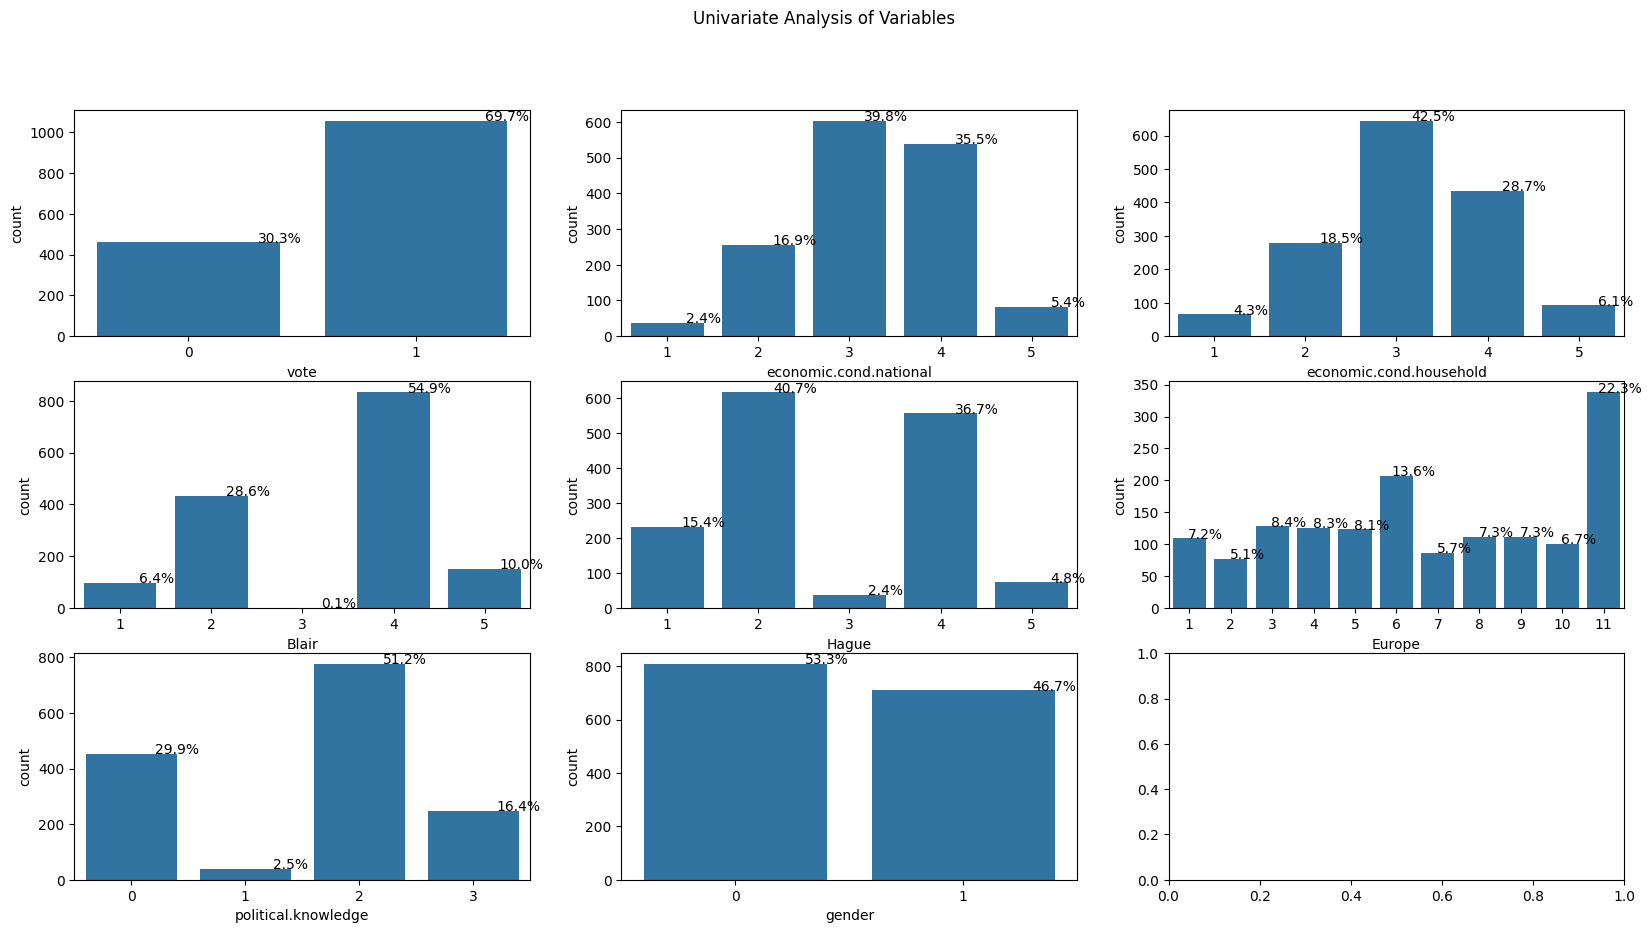

In [61]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
fig.suptitle('Univariate Analysis of Variables')
list_plots = []

p1=sns.countplot(Elec_Data, x='vote',ax=axes[0, 0])
p2=sns.countplot(Elec_Data, x='economic.cond.national',ax=axes[0, 1])
p3=sns.countplot(Elec_Data, x='economic.cond.household',ax=axes[0, 2])
p4=sns.countplot(Elec_Data, x='Blair',ax=axes[1, 0])
p5=sns.countplot(Elec_Data, x='Hague',ax=axes[1, 1])
p6=sns.countplot(Elec_Data, x='Europe',ax=axes[1, 2])
p7=sns.countplot(Elec_Data, x='political.knowledge',ax=axes[2, 0])
p8=sns.countplot(Elec_Data, x='gender',ax=axes[2, 1])
list_plots.append(p1)
list_plots.append(p2)
list_plots.append(p3)
list_plots.append(p4)
list_plots.append(p5)
list_plots.append(p6)
list_plots.append(p7)
list_plots.append(p8)
for p in list_plots:
    for i in p.patches:
        percentage = '{:.1f}%'.format(100 * i.get_height()/total)
        x = i.get_x() + i.get_width()
        y = i.get_height()
        p.annotate(percentage, (x, y),ha='center')

<Axes: xlabel='gender'>

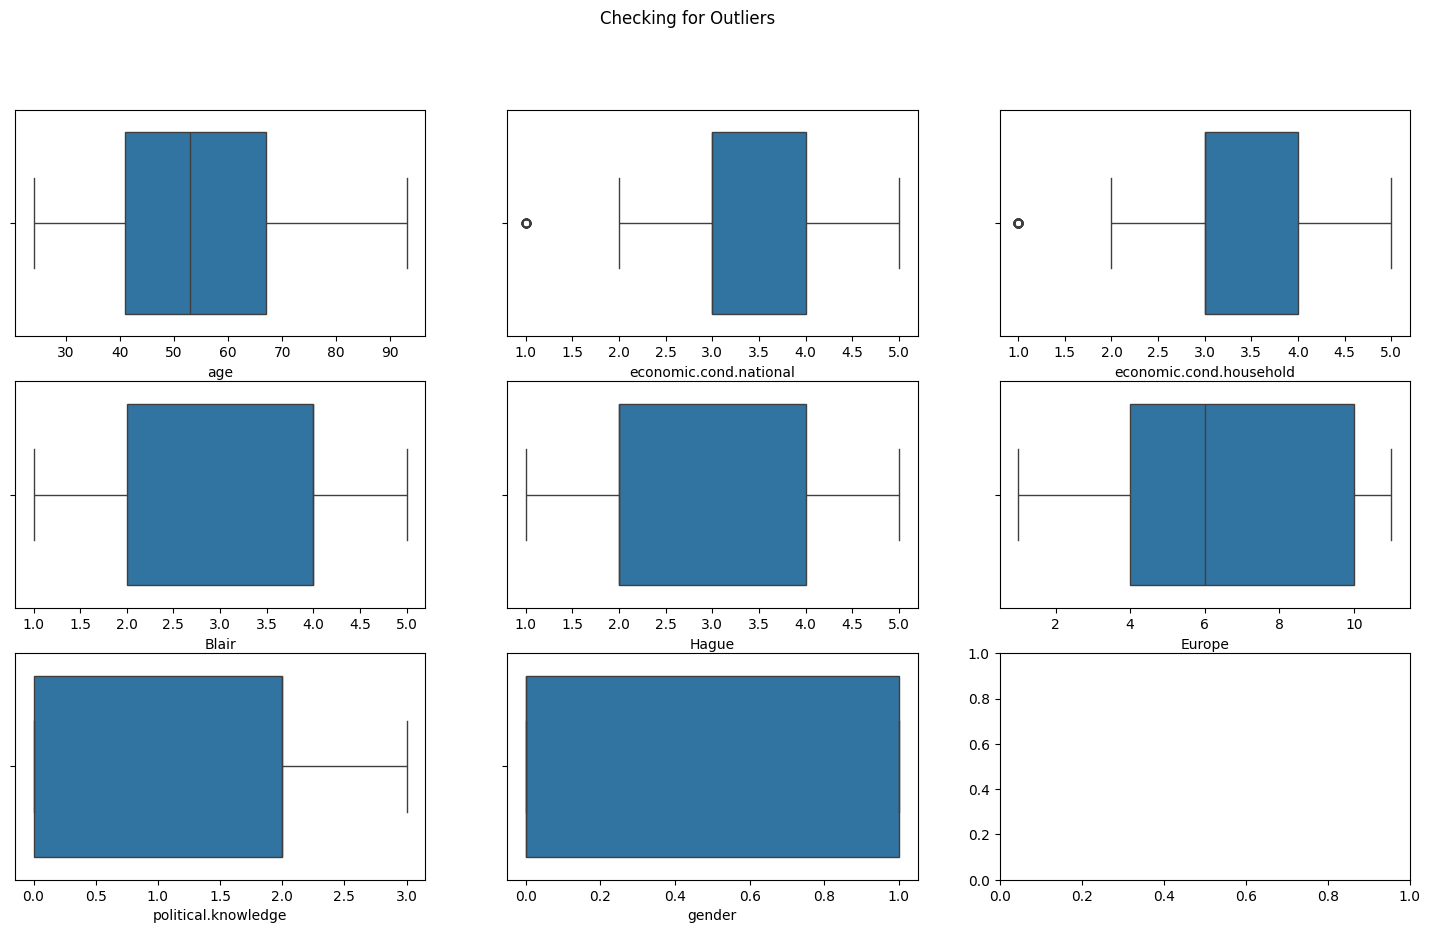

In [63]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
fig.suptitle('Checking for Outliers ')
sns.boxplot(Elec_Data, x='age',ax=axes[0, 0])
sns.boxplot(Elec_Data, x='economic.cond.national',ax=axes[0, 1])
sns.boxplot(Elec_Data, x='economic.cond.household',ax=axes[0, 2])
sns.boxplot(Elec_Data, x='Blair',ax=axes[1, 0])
sns.boxplot(Elec_Data, x='Hague',ax=axes[1, 1])
sns.boxplot(Elec_Data, x='Europe',ax=axes[1, 2])
sns.boxplot(Elec_Data, x='political.knowledge',ax=axes[2, 0])
sns.boxplot(Elec_Data, x='gender',ax=axes[2, 1])

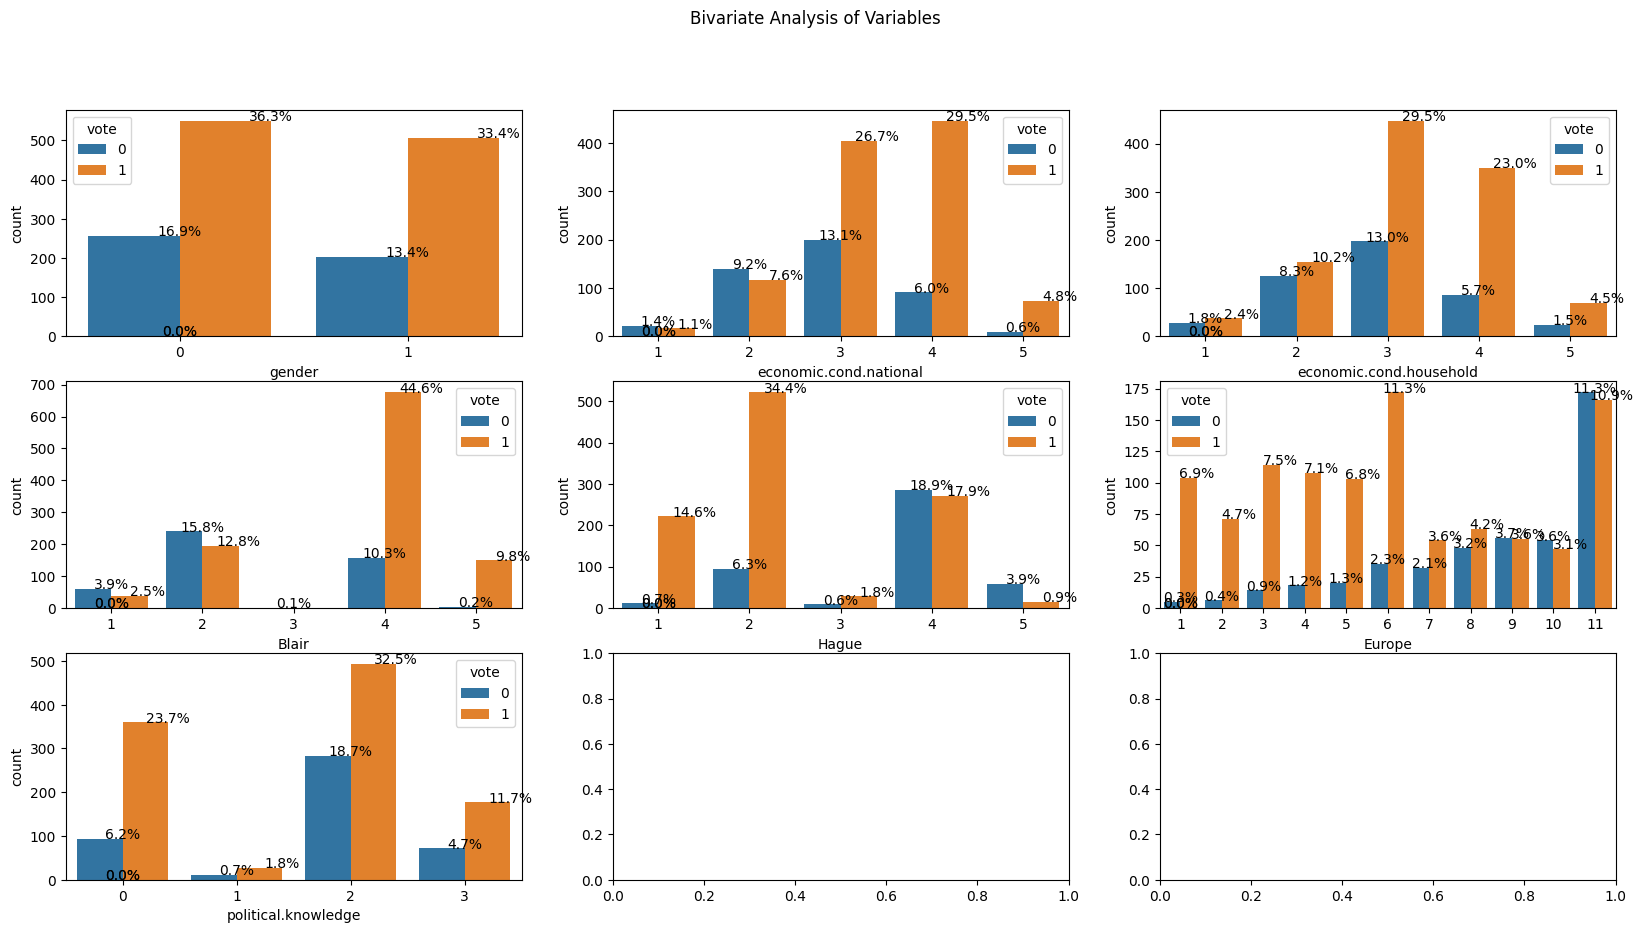

In [64]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
fig.suptitle('Bivariate Analysis of Variables')
list_plots = []

p1=sns.countplot(Elec_Data, x='gender',hue='vote',ax=axes[0, 0])
p2=sns.countplot(Elec_Data, x='economic.cond.national',hue='vote',ax=axes[0, 1])
p3=sns.countplot(Elec_Data, x='economic.cond.household',hue='vote',ax=axes[0, 2])
p4=sns.countplot(Elec_Data, x='Blair',hue='vote',ax=axes[1, 0])
p5=sns.countplot(Elec_Data, x='Hague',hue='vote',ax=axes[1, 1])
p6=sns.countplot(Elec_Data, x='Europe',hue='vote',ax=axes[1, 2])
p7=sns.countplot(Elec_Data, x='political.knowledge',hue='vote',ax=axes[2, 0])
#p8=sns.countplot(Elec_Data, x='gender',ax=axes[2, 1])
list_plots.append(p1)
list_plots.append(p2)
list_plots.append(p3)
list_plots.append(p4)
list_plots.append(p5)
list_plots.append(p6)
list_plots.append(p7)
#list_plots.append(p8)
for p in list_plots:
    for i in p.patches:
        percentage = '{:.1f}%'.format(100 * i.get_height()/total)
        x = i.get_x() + i.get_width()
        y = i.get_height()
        p.annotate(percentage, (x, y),ha='center')

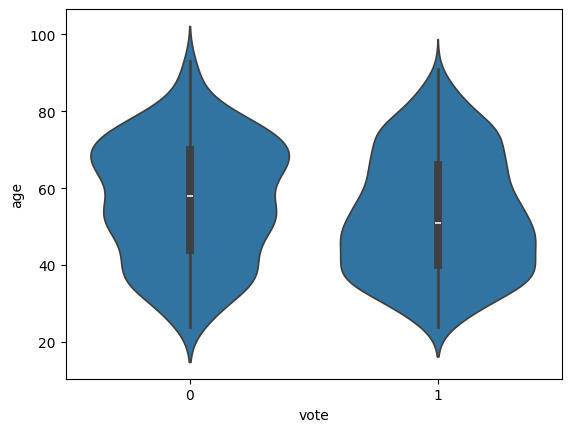

In [65]:
sns.violinplot(Elec_Data,x='vote',y='age');

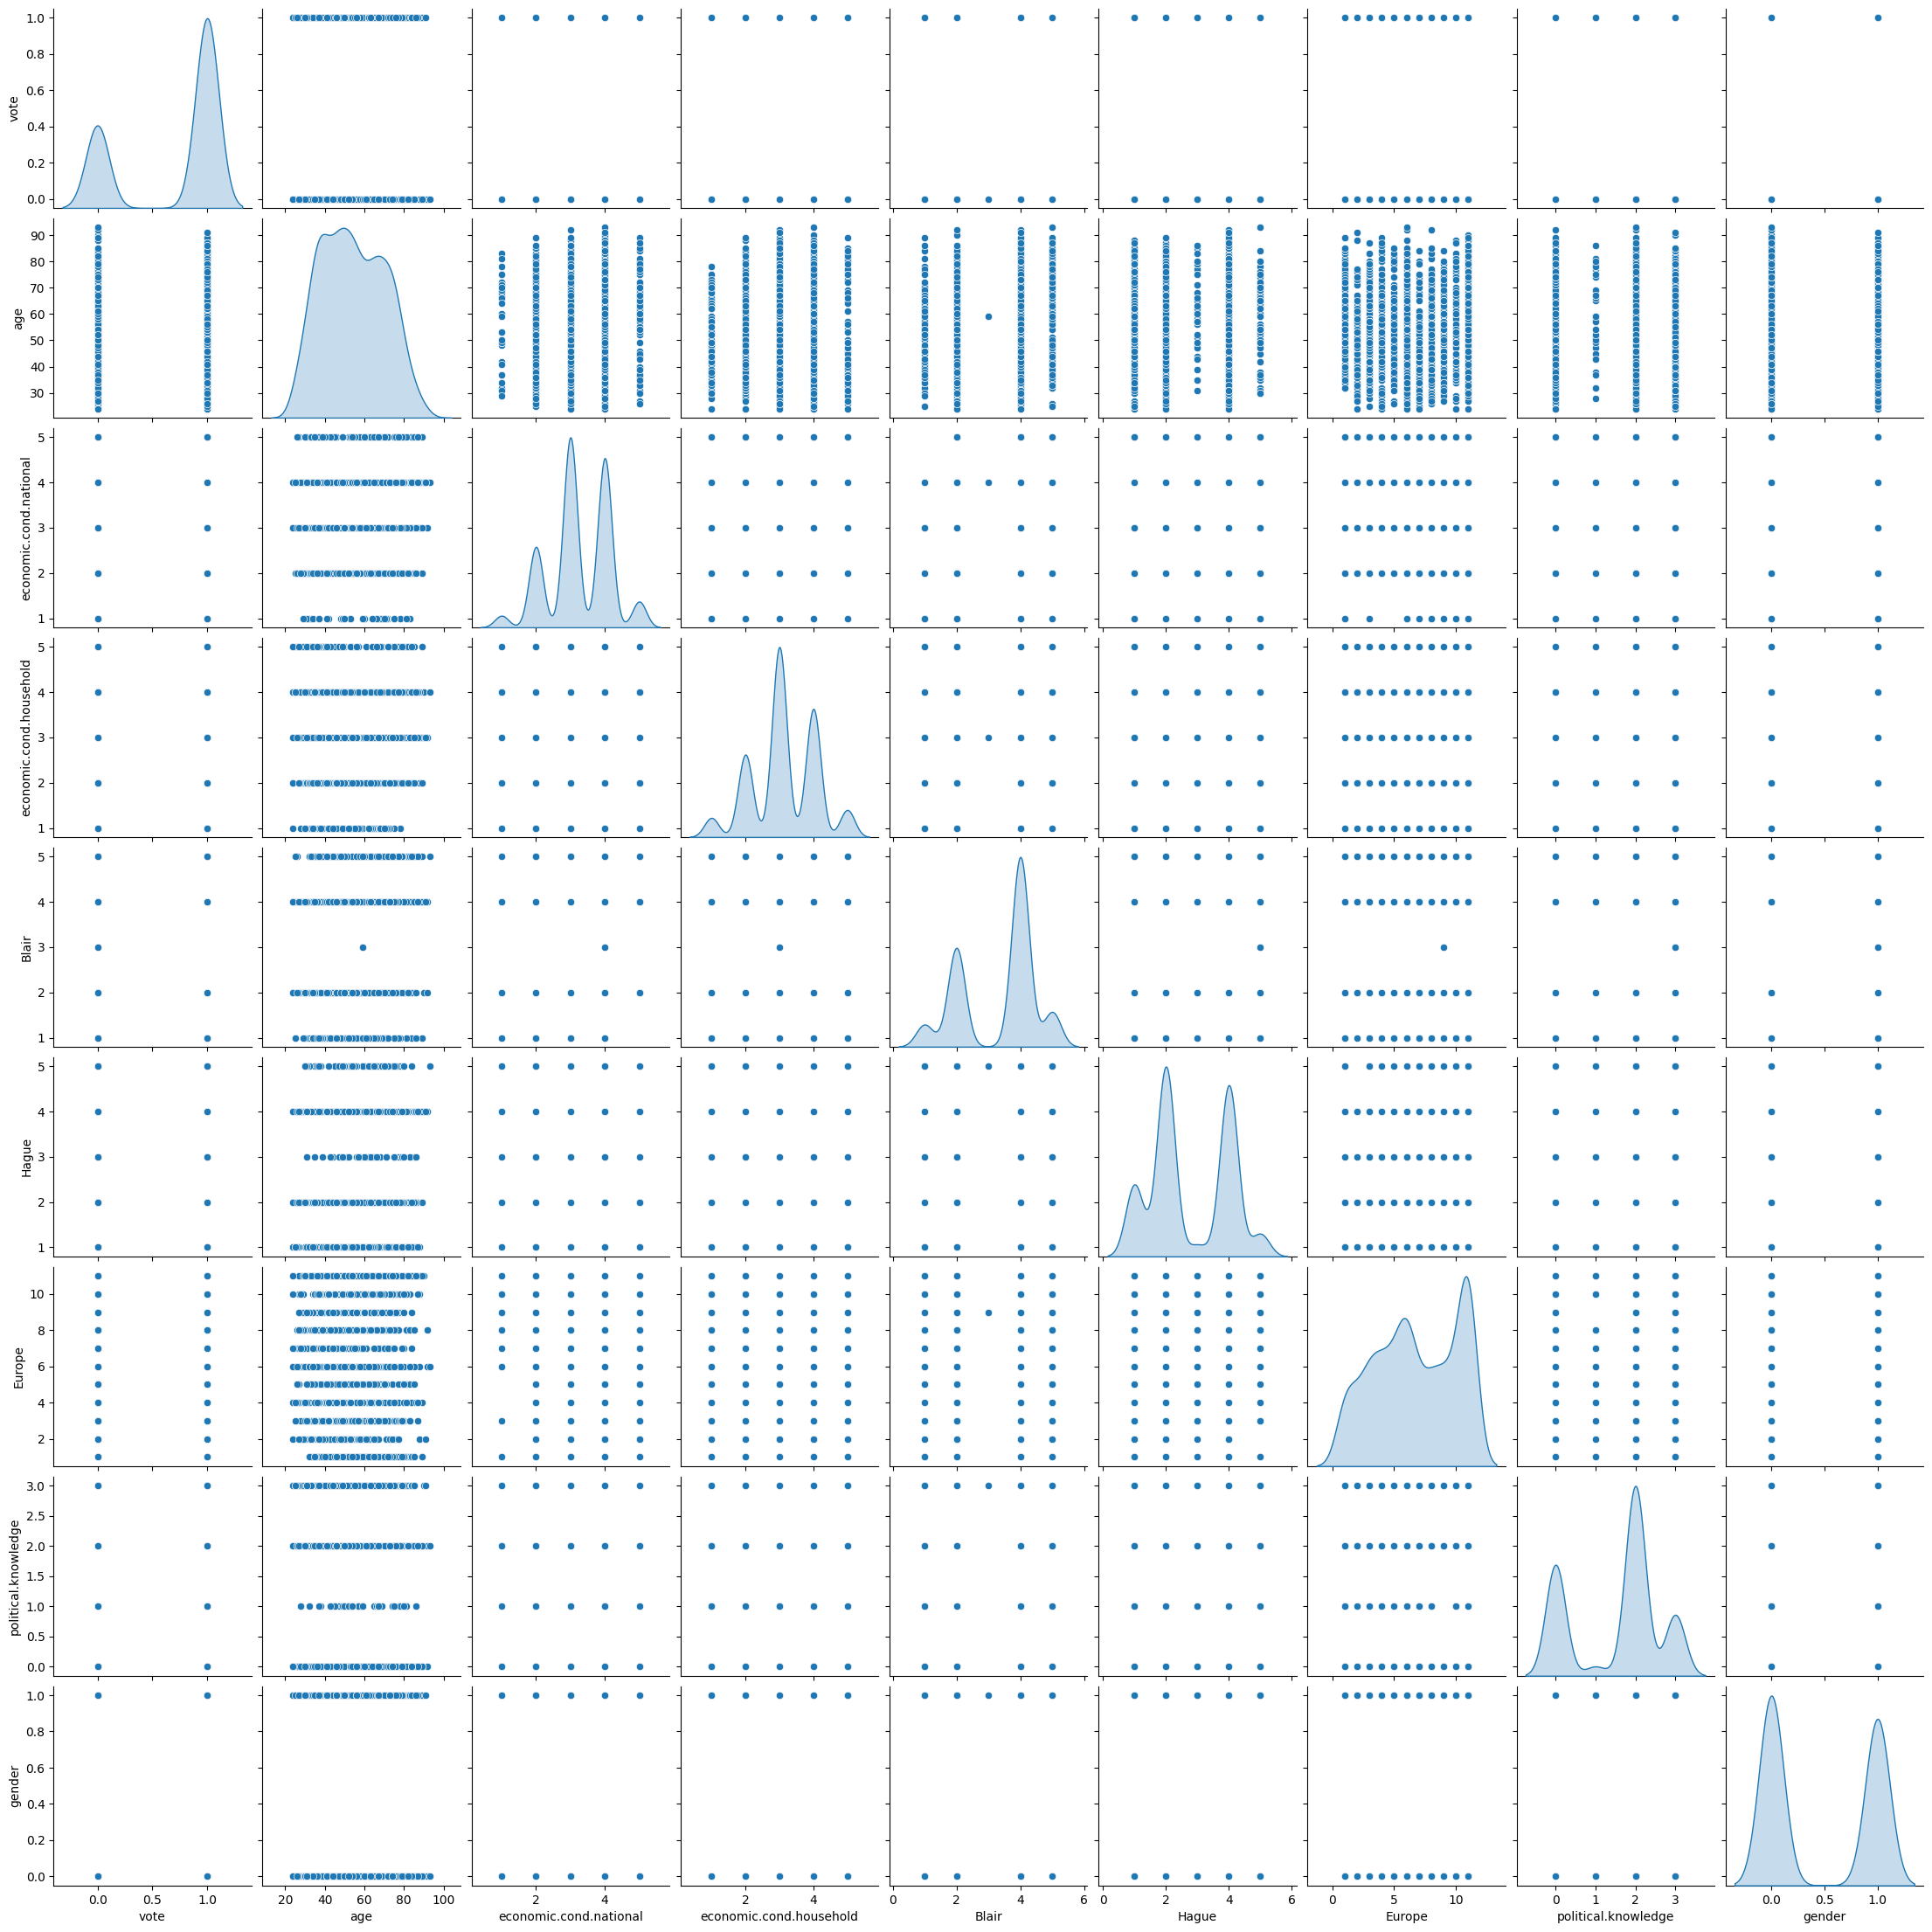

In [66]:
sns.pairplot(Elec_Data,diag_kind='kde')

In [25]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Elec_Data['vote']= label_encoder.fit_transform(Elec_Data['vote'])
Elec_Data['vote'].unique() 

array([1, 0])

In [26]:
Elec_Data['gender']= label_encoder.fit_transform(Elec_Data['gender'])
Elec_Data['gender'].unique() 

array([0, 1])

In [27]:
Elec_Data

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1
...,...,...,...,...,...,...,...,...,...
1512,0,67,5,3,2,4,11,3,1
1513,0,73,2,2,4,4,8,2,1
1514,1,37,3,3,5,4,2,2,1
1515,0,61,3,3,1,4,11,2,1


In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(Elec_Data)
data_scaled = scaler.transform(Elec_Data)

In [68]:
Elec_Data


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1
...,...,...,...,...,...,...,...,...,...
1512,0,67,5,3,2,4,11,3,1
1513,0,73,2,2,4,4,8,2,1
1514,1,37,3,3,5,4,2,2,1
1515,0,61,3,3,1,4,11,2,1


In [29]:
from sklearn.model_selection import train_test_split
X=Elec_Data.drop("vote",axis=1)
y=Elec_Data["vote"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
print(model)
model.fit(X_train, y_train)
expected = y_test
predicted=model.predict(X_test)
model_scoreLogistic1 = model.score(X_train, y_train)
model_scoreLogistic2 = model.score(X_test, y_test)
print("Model score for Train Data",model_scoreLogistic1)
print("Model score for Test Data",model_scoreLogistic2)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

LogisticRegression()
Model score for Train Data 0.8350612629594723
Model score for Test Data 0.8245614035087719
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456

[[110  43]
 [ 37 266]]


In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
print(model)
model.fit(X_train, y_train)
expected = y_test
predicted=model.predict(X_test)
model_scoreLDA1 = model.score(X_train, y_train)
model_scoreLDA2 = model.score(X_test, y_test)
print("Model score for Train Data",model_scoreLDA1)
print("Model score for Test Data",model_scoreLDA2)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

LinearDiscriminantAnalysis()
Model score for Train Data 0.8341187558906692
Model score for Test Data 0.8333333333333334
              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456

[[111  42]
 [ 34 269]]


In [73]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
print(model)
model.fit(X_train, y_train)
expected = y_test
predicted=model.predict(X_test)
model_scoreKNN1= model.score(X_train, y_train)
model_scoreKNN2 = model.score(X_test, y_test)
print("Model score for Train Data",model_scoreKNN1)
print("Model score for Test Data",model_scoreKNN2)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

KNeighborsClassifier()
Model score for Train Data 0.8557964184731386
Model score for Test Data 0.8245614035087719
              precision    recall  f1-score   support

           0       0.78      0.66      0.72       153
           1       0.84      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456

[[101  52]
 [ 28 275]]


In [74]:

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
model_score1 = model.score(X_train, y_train)
model_score2 = model.score(X_test, y_test)
print("Model score for Train Data",model_score1)
print("Model score for Test Data",model_score2)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB()
Model score for Train Data 0.8350612629594723
Model score for Test Data 0.8223684210526315
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456

[[112  41]
 [ 40 263]]


In [133]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, random_state=1)
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
model_score1 = model.score(X_train, y_train)
model_score2 = model.score(X_test, y_test)
print("Model score for Train Data",model_score1)
print("Model score for Train Data",model_score2)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))


Model score for Train Data 0.9905749293119699
Model score for Train Data 0.8201754385964912
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       153
           1       0.86      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456

[[110  43]
 [ 39 264]]


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [38]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [39]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [40]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [41]:
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8463713477851084
Accuracy on test set :  0.8135964912280702
Recall on training set :  0.9124668435013262
Recall on test set :  0.8778877887788779
Precision on training set :  0.8764331210191083
Precision on test set :  0.8471337579617835


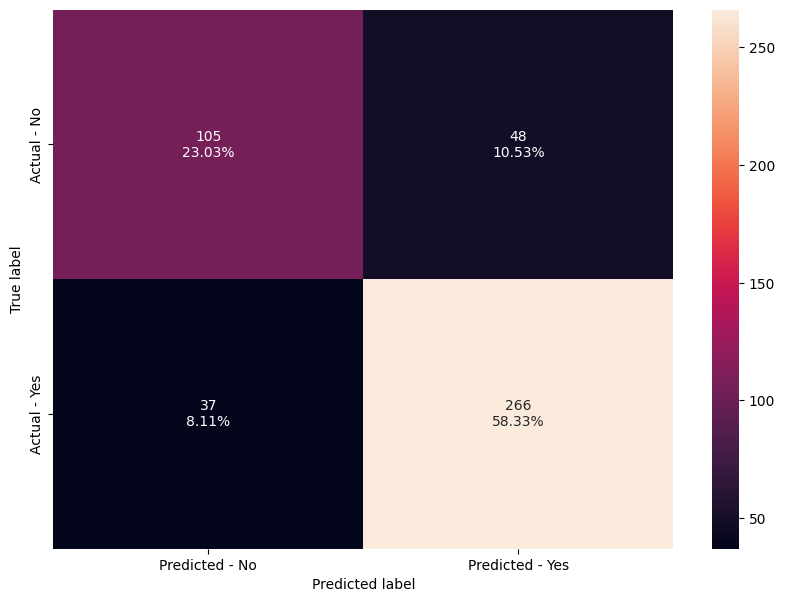

In [42]:
make_confusion_matrix(abc,y_test)

In [43]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [44]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8925541941564562
Accuracy on test set :  0.8355263157894737
Recall on training set :  0.9389920424403183
Recall on test set :  0.9108910891089109
Precision on training set :  0.9123711340206185
Precision on test set :  0.8518518518518519


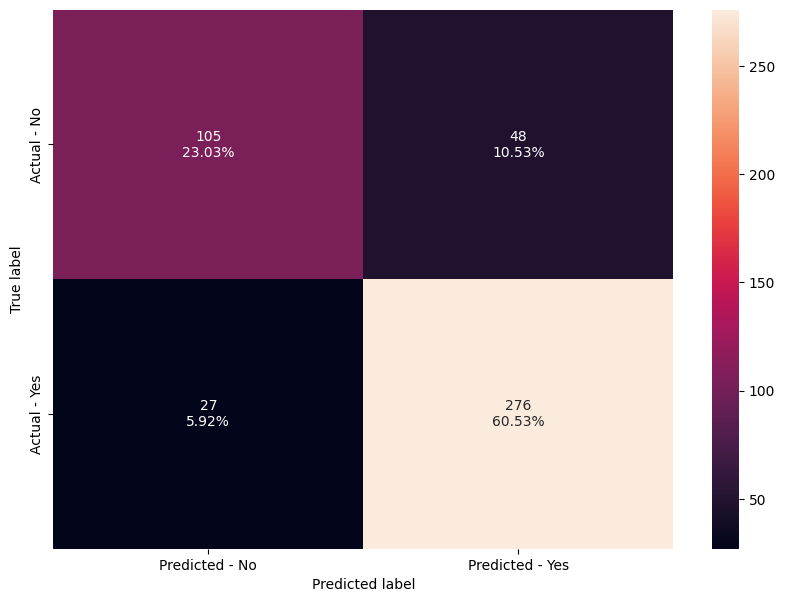

In [45]:
make_confusion_matrix(gbc,y_test)

In [46]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [47]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9915174363807728
Accuracy on test set :  0.831140350877193
Recall on training set :  0.9973474801061007
Recall on test set :  0.8910891089108911
Precision on training set :  0.9907773386034255
Precision on test set :  0.8598726114649682


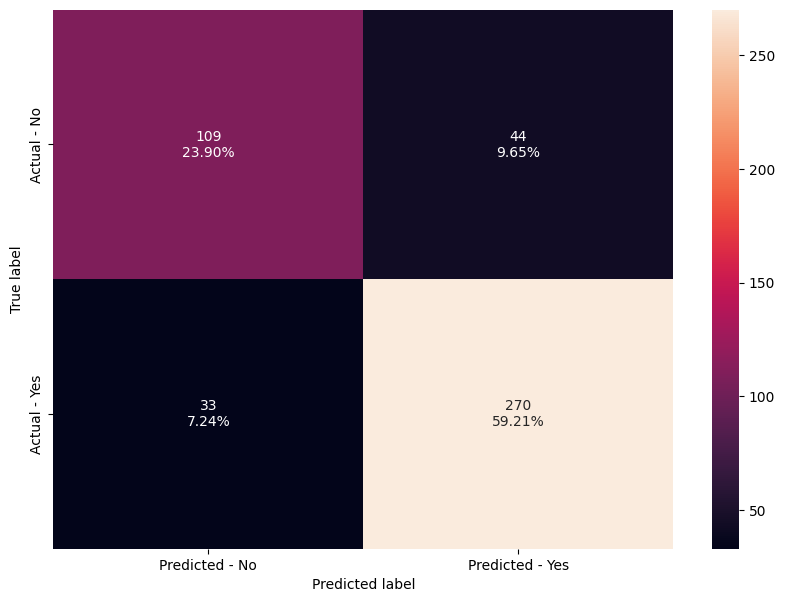

In [48]:
make_confusion_matrix(xgb,y_test)

In [49]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=20, random_state=1)

In [50]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.7945334590009425
Accuracy on test set :  0.7785087719298246
Recall on training set :  0.9575596816976127
Recall on test set :  0.9636963696369637
Precision on training set :  0.7951541850220264
Precision on test set :  0.7643979057591623


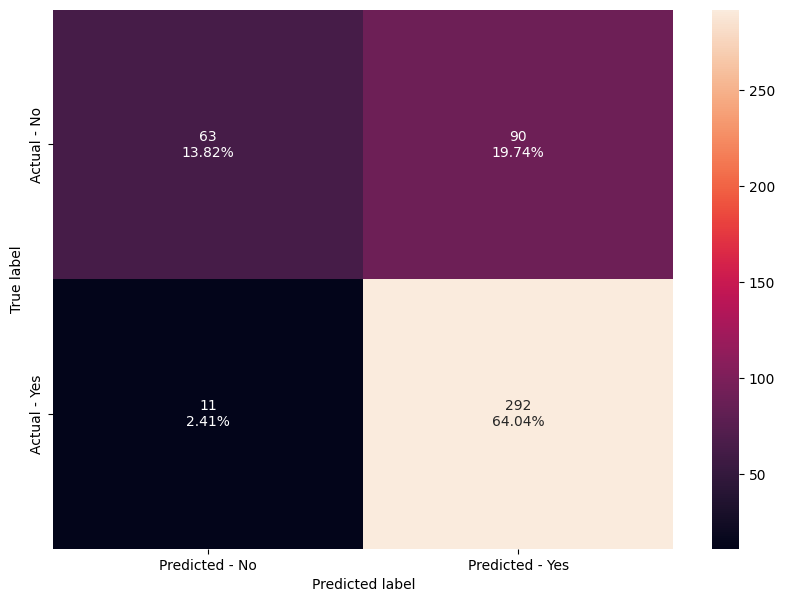

In [82]:
make_confusion_matrix(abc_tuned,y_test)

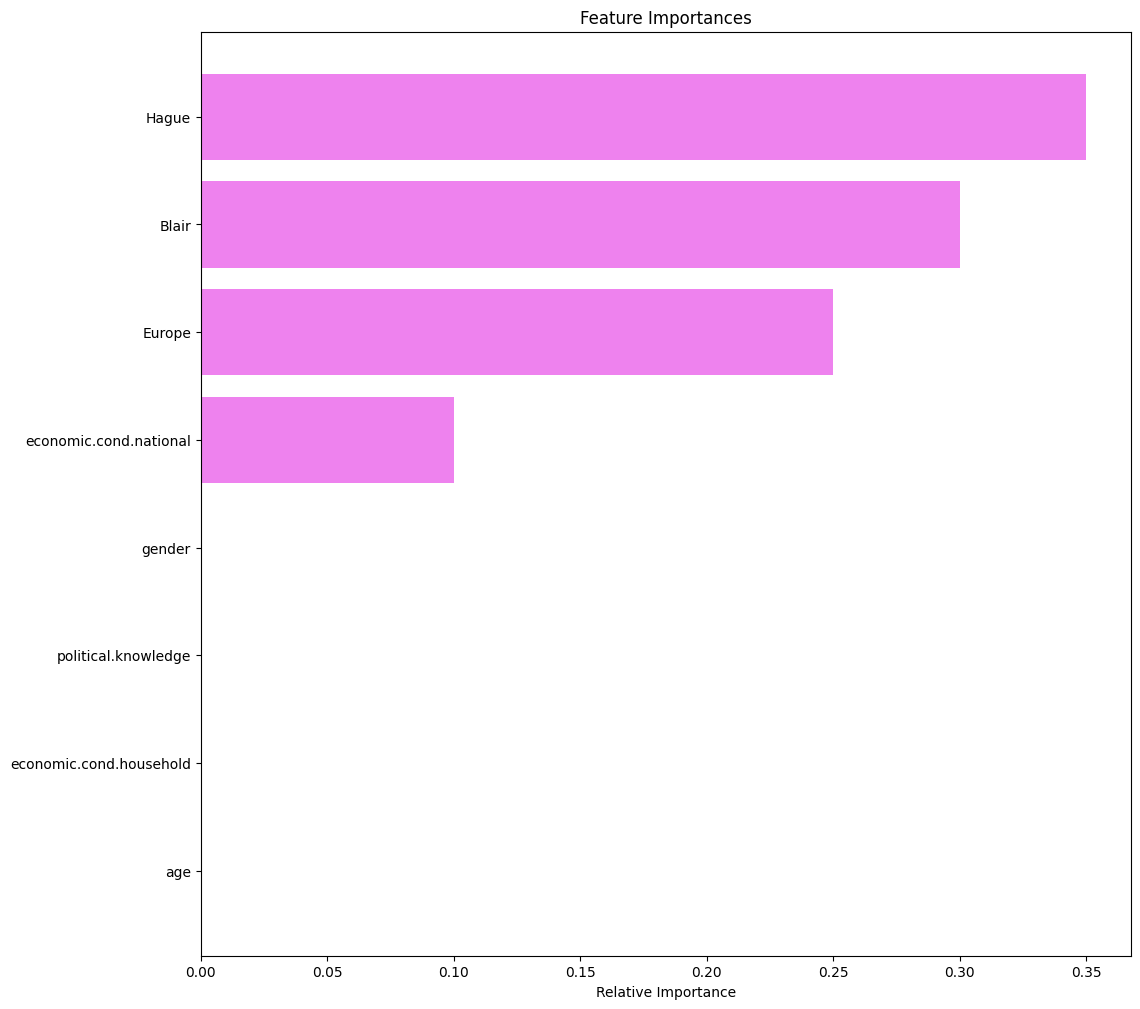

In [51]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [52]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [53]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.8925541941564562
Accuracy on test set :  0.8377192982456141
Recall on training set :  0.9416445623342176
Recall on test set :  0.9141914191419142
Precision on training set :  0.9102564102564102
Precision on test set :  0.8523076923076923


In [54]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)
# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, random_state=1, subsample=1)

In [55]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.8737040527803959
Accuracy on test set :  0.8333333333333334
Recall on training set :  0.9350132625994695
Recall on test set :  0.9075907590759076
Precision on training set :  0.8924050632911392
Precision on test set :  0.8513931888544891


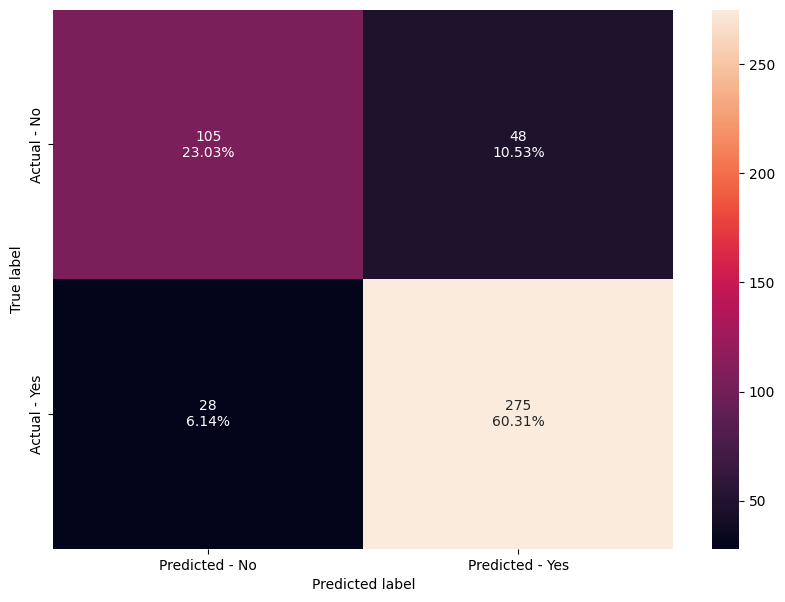

In [56]:
make_confusion_matrix(gbc_tuned,y_test)

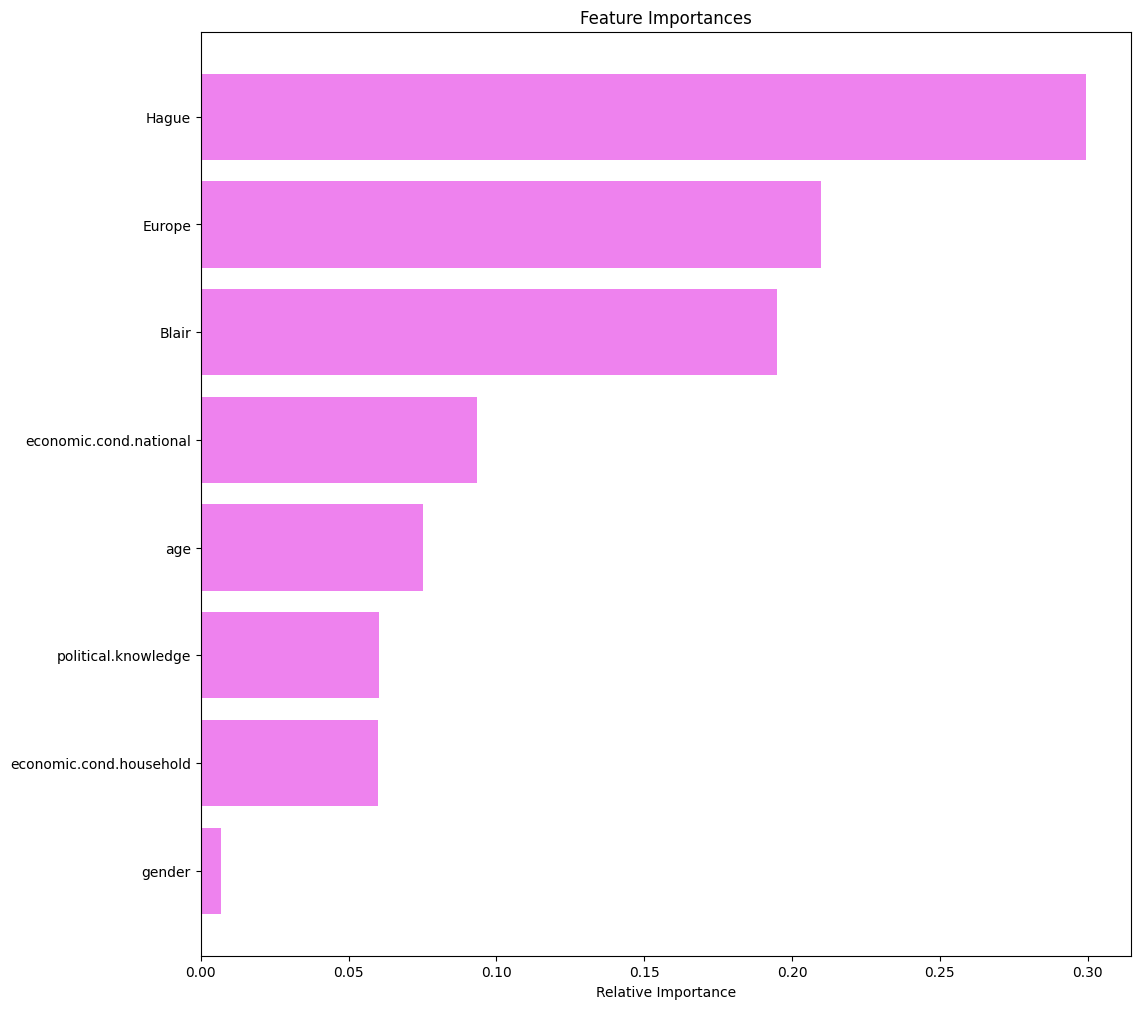

In [57]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [58]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [83]:
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.7106503298774741
Accuracy on test set :  0.6644736842105263
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.7106503298774741
Precision on test set :  0.6644736842105263


In [84]:
import re
import nltk 

In [88]:
speech_df=pd.read_excel("Project_Speech.xlsx")

In [89]:
speech_df

,Name,Speech
0,Roosevelt,On each national day of inauguration since 178...
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


## Total no of words

In [101]:
speech_df['totalwords'] = [len(x.split()) for x in speech_df['Speech'].tolist()]
print(speech_df)

        Name                                             Speech  totalwords
0  Roosevelt  On each national day of inauguration since 178...        1323
1    Kennedy  Vice President Johnson, Mr. Speaker, Mr. Chief...        1364
2      Nixon  Mr. Vice President, Mr. Speaker, Mr. Chief Jus...        1769


## Total no of Characters

In [104]:
speech_df['char_count'] = speech_df['Speech'].str.len() 
print(speech_df)

        Name                                             Speech  totalwords  \
0  Roosevelt  On each national day of inauguration since 178...        1323   
1    Kennedy  Vice President Johnson, Mr. Speaker, Mr. Chief...        1364   
2      Nixon  Mr. Vice President, Mr. Speaker, Mr. Chief Jus...        1769   

   char_count  
0        7651  
1        7673  
2       10106  


In [105]:
print("No of sentences in President Roosevelt speech", len(speech_df['Speech'][0].split(".")))
print("No of sentences in President Kennedy speech",len(speech_df['Speech'][1].split(".")))
print("No of sentences in President Nixon speech",len(speech_df['Speech'][2].split(".")))

No of sentences in President Roosevelt speech 69
No of sentences in President Kennedy speech 56
No of sentences in President Nixon speech 70


In [106]:
from nltk.corpus import stopwords

In [109]:
stop = stopwords.words('english')

In [115]:
speech_df['all_words_clean'] = speech_df['Speech'].apply(lambda x: len([x for x in x.split() if x in stop]))
print(speech_df[['Speech','all_words_clean']].head())

                                              Speech  all_words_clean
0  On each national day of inauguration since 178...              632
1  Vice President Johnson, Mr. Speaker, Mr. Chief...              618
2  Mr. Vice President, Mr. Speaker, Mr. Chief Jus...              899


In [125]:
speech_df['all_words__clean']

KeyError: 'all_words__clean'

In [116]:
print(speech_df)

        Name                                             Speech  totalwords  \
0  Roosevelt  On each national day of inauguration since 178...        1323   
1    Kennedy  Vice President Johnson, Mr. Speaker, Mr. Chief...        1364   
2      Nixon  Mr. Vice President, Mr. Speaker, Mr. Chief Jus...        1769   

   char_count  stopwords  all_words_clean  
0        7651        632              632  
1        7673        618              618  
2       10106        899              899  


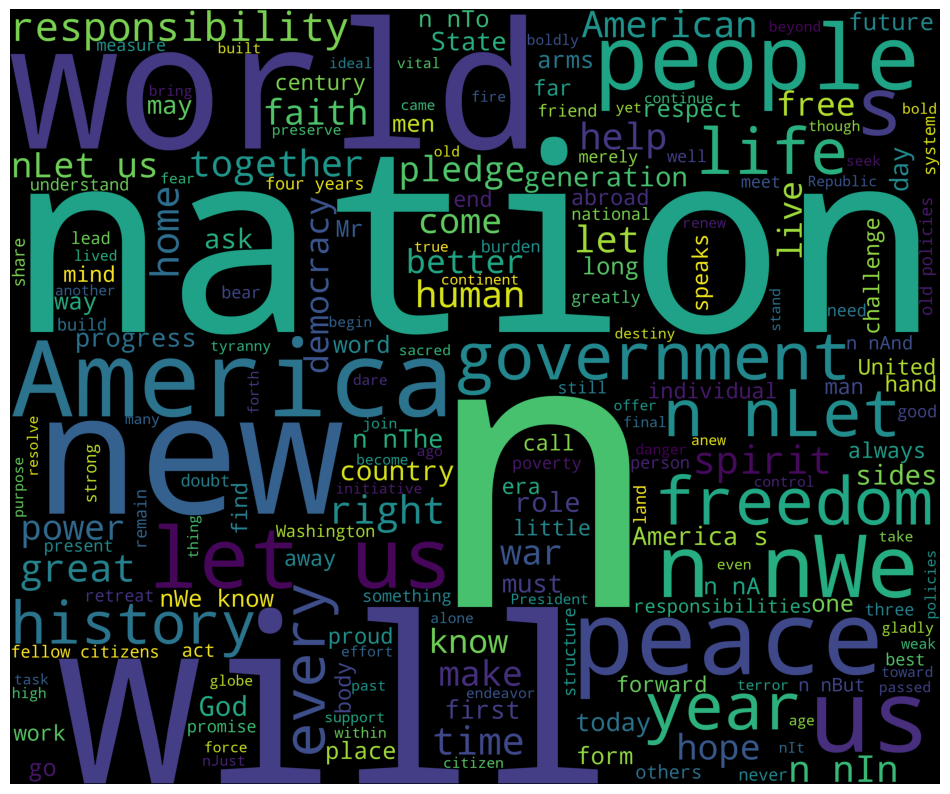

In [135]:
from wordcloud import WordCloud,STOPWORDS

words = ' '.join(speech_df['Speech'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
